# Etsy Jewelry Market Analysis

### Ling Wang 
#### Dec 08 2025

## 1. Introduction


This project analyzes the Etsy jewelry market using top-seller and listing-level data from eRank. The goals are to:
Understand market-level dynamics: sales concentration, store maturity, and growth efficiency.
Explore product-level performance: best-selling categories, pricing effects, and engagement metrics (views/favorites) related to sales.
Provide actionable insights for potential new sellers and existing shops considering product and pricing strategies.
The analysis uses Python (pandas, NumPy, seaborn, scikit-learn) for data wrangling, visualization, and basic modeling.

## 2. Data Description and Preparation

### Datasets

Two main sources were used:
Market-level file (df0) – eRank - Top Sellers.xlsx

Each row represents a shop with total estimated sales and the year established.
Listing-level files (df1–df10) – individual shop listing exports

Combined into a single DataFrame df using:

### Import Libraries and load data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression

In [117]:
df0 =  pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/eRank - Top Sellers.xlsx",skiprows=1)

In [118]:
print(df0.columns)

Index(['RANK', 'SHOP', 'SALES', 'COUNTRY', 'YEAR ', 'CATEGORY'], dtype='object')


                  SHOP      SALES
0    CaitlynMinimalist  3546010.0
1      MignonandMignon   820464.0
2  GLDNxLayeredAndLong   590726.0
3             delezhen   513180.0
4         OuferJewelry   494179.0
5          MadeOfMetal   483190.0
6           SamiJEWELS   476468.0
7            TomDesign   471552.0
8    GracePersonalized   429587.0
9              BABEINA   396046.0


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\1014710288.py:7: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\1014710288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


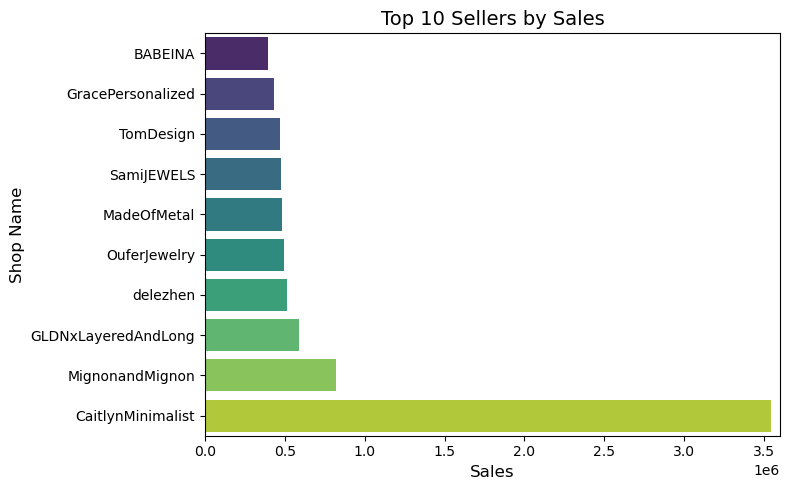

In [119]:
sales_col = 'SALES'
shop_col = 'SHOP'

df0[sales_col] = (
    df0[sales_col]
    .astype(str)
    .replace('[\$,]', '', regex=True)
    .replace(',', '', regex=True)
    .astype(float)
)

top10 = df0.sort_values(by=sales_col, ascending=False).head(10)


print(top10[[shop_col, sales_col]])
plt.figure(figsize=(8,5))
sns.barplot(
    data=top10,
    x=sales_col,
    y=shop_col,
    palette='viridis',
    order=top10.sort_values(by=sales_col, ascending=True)[shop_col])  

plt.title("Top 10 Sellers by Sales", fontsize=14)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Shop Name", fontsize=12)
plt.xlim(0, 3_600_000)
plt.tight_layout()
plt.show()

In [120]:
df1 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/CaitlynMinimalist - Shop listings.xlsx",skiprows=1)

In [121]:
df2 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/MignonandMignon - Shop listings.xlsx",skiprows=1)

In [122]:
df3 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/GLDNxLayeredAndLong - Shop listings.xlsx",skiprows=1)

In [123]:
df4 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/delezhen - Shop listings.xlsx",skiprows=1)

In [124]:
df5 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/OuferJewelry - Shop listings.xlsx",skiprows=1)

In [125]:
df6 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/MadeOfMetal - Shop listings (1).xlsx",skiprows=1)

In [126]:
df7 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/SamiJEWELS - Shop listings.xlsx",skiprows=1)

In [127]:
df8 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/TomDesign - Shop listings.xlsx",skiprows=1)

In [128]:
df9 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/GracePersonalized - Shop listings.xlsx",skiprows=1)

In [129]:
df10 = pd.read_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/BABEINA - Shop listings.xlsx",skiprows=1)

In [130]:
df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index=True)

In [131]:
df.to_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/Top10seller Listings.xlsx", index=False)

### Data Wrangling

Several columns were originally stored as strings with symbols (commas, currency marks). These were converted to numeric:

In [132]:
df["EST. SALES"] = (
    df["EST. SALES"]
    .astype(str)                     
    .str.replace(r"[^0-9.]", "", regex=True) 
    .astype(float)
)

In [133]:
df["LISTING AGE"] = (
    df["LISTING AGE"]
    .astype(str)                     
    .str.replace(r"[^0-9.]", "", regex=True) 
    .astype(float)
)

In [134]:
df["EST. REVENUE"] = (
    df["EST. REVENUE"]
    .astype(str)                     
    .str.replace(r"[^0-9.]", "", regex=True) 
    .astype(float)
)

In [135]:
df["PRICE"] = (
    df["PRICE"]
    .astype(str)                     
    .str.replace(r"[^0-9.]", "", regex=True) 
    .astype(float)
)

In [136]:
df["TOTAL VIEWS"] = (
    df["TOTAL VIEWS"]
    .astype(str)                     
    .str.replace(r"[^0-9.]", "", regex=True) 
    .astype(float)
)

In [137]:
df["FAVORITES"] = (
    df["FAVORITES"]
    .astype(str)                     
    .str.replace(r"[^0-9.]", "", regex=True) 
    .astype(float)
)

For the market-level data df0, additional transformations were applied:

In [138]:
df0["SALES"] = (
    df0["SALES"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .astype(float)
)

df0["YEAR"] = (
    df0["YEAR "]
    .astype(str)
    .str.extract(r"(\d{4})", expand=False)
    .astype(float)
)

current_year = 2025
df0["STORE_AGE"] = current_year - df0["YEAR"]
df0["STORE_AGE"] = df0["STORE_AGE"].replace(0, np.nan)
df0["SALES_DENSITY"] = df0["SALES"] / df0["STORE_AGE"]

In [139]:
df["AVG_DAILY_SALES"] = df["EST. SALES"] / df["LISTING AGE"]

In [140]:
df = df.drop(columns=["TAGS", "LAST UPDATED","#"], axis=1)

In [141]:
df

,LISTING,LISTING ID,TOTAL VIEWS,FAVORITES,EST. SALES,EST. REVENUE,PRICE,LISTING AGE,DAILY VIEWS,AVG_DAILY_SALES
0,Moonstone Bezel Stud Earrings by Caitlyn Minim...,1887201708,1976.0,163.0,37.0,980.5,26.5,199.0,9.93,0.185930
1,Diamond Huggie Earrings by Caitlyn Minimalist ...,945311140,1907671.0,82747.0,35864.0,950396.0,26.5,1722.0,1107.82,20.826945
2,Beaded Pearl Heart Drop Earrings by Caitlyn Mi...,4329336635,228.0,44.0,3.0,94.5,31.5,117.0,1.95,0.025641
3,"Butterfly Necklace in Sterling Silver, Gold & ...",794411468,171376.0,9435.0,2245.0,94290.0,42.0,1994.0,85.95,1.125878
4,Dainty Name Charm Necklace by CaitlynMinimalis...,1153406329,182243.0,5401.0,2514.0,93018.0,37.0,1392.0,130.92,1.806034
...,...,...,...,...,...,...,...,...,...,...
3886,"Pave Letter Initial Necklace with Birthstone, ...",1330008360,24088.0,724.0,387.0,11610.0,30.0,1088.0,22.14,0.355699
3887,"18K Gold Angel Number Anklet, Personalized Gif...",1189436822,2807.0,133.0,52.0,1482.0,28.5,1318.0,2.13,0.039454
3888,Extra Jewelry Box,1335308012,887.0,14.0,22.0,242.0,11.0,1081.0,0.82,0.020352
3889,"Engraved Padlock Necklace, Mini Lock Initial P...",1593407330,19681.0,601.0,316.0,9796.0,31.0,723.0,27.22,0.437068


## 3. Market-Level Analysis

### 3.1 Sales Concentration (Pareto Analysis)
To measure how concentrated the market is, shops were sorted by total SALES and cumulative sales share was computed:

In [142]:
df0_sorted = df0.sort_values("SALES", ascending=False).reset_index(drop=True)

# Cumulative sales and cumulative share
total_sales = df0_sorted["SALES"].sum()
df0_sorted["CUM_SALES"] = df0_sorted["SALES"].cumsum()
df0_sorted["CUM_SHARE"] = df0_sorted["CUM_SALES"] / total_sales

# How many top sellers account for 80% of sales?
top_80 = df0_sorted[df0_sorted["CUM_SHARE"] <= 0.8]
num_top_80 = len(top_80)
print(f"Top {num_top_80} shops account for ~80% of total sales.")

Top 62 shops account for ~80% of total sales.


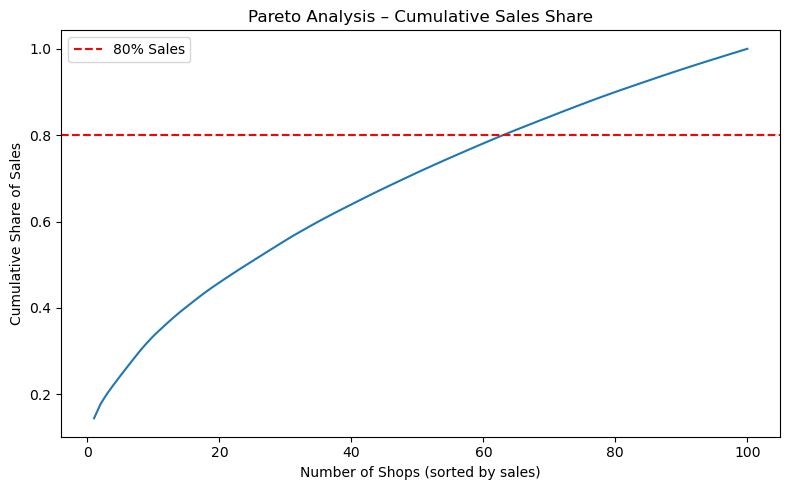

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.lineplot(
    data=df0_sorted,
    x=df0_sorted.index + 1,
    y="CUM_SHARE"
)
plt.axhline(0.8, color="red", linestyle="--", label="80% Sales")
plt.title("Pareto Analysis – Cumulative Sales Share")
plt.xlabel("Number of Shops (sorted by sales)")
plt.ylabel("Cumulative Share of Sales")
plt.legend()
plt.tight_layout()
plt.show()

### Result:

Top 62 shops account for approximately 80% of total sales.
A Pareto chart of cumulative share vs. number of shops shows a steep increase at the beginning, confirming a highly concentrated market where a relatively small group of sellers dominates overall sales.

Interpretation:
The Etsy jewelry market has strong winner-take-most dynamics. New entrants face established competitors with large market shares, but there is still a long tail of smaller shops.



### 3.2 Store Age vs. Total Sales
To explore whether older stores necessarily perform better, we plotted STORE_AGE against SALES with a regression line

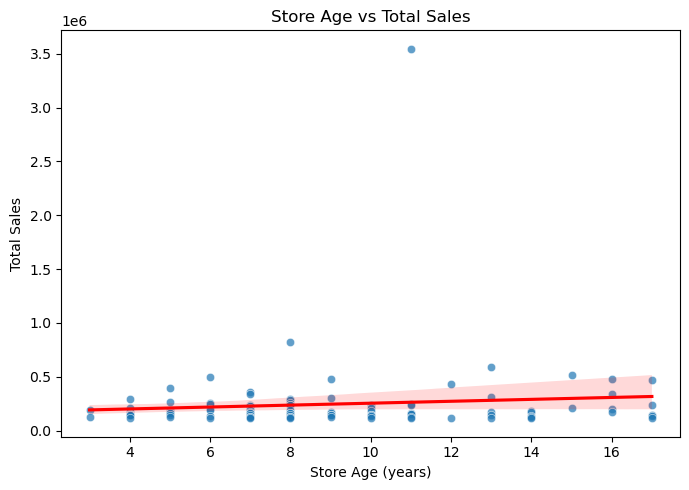

In [144]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df0, x="STORE_AGE", y="SALES", alpha=0.7)
sns.regplot(
    data=df0,
    x="STORE_AGE",
    y="SALES",
    scatter=False,
    color="red"
)
plt.title("Store Age vs Total Sales")
plt.xlabel("Store Age (years)")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

### Findings:

There is a positive relationship between store age and total sales (older shops have had more time to accumulate sales), but:
There is large dispersion: some relatively young shops have very high sales.
Many older shops are still mid-range performers.
### Conclusion:
Being older helps, but store age alone does not guarantee success. New shops can still achieve high sales with the right product and positioning.

### 3.3 Sales Density (Growth Efficiency)​


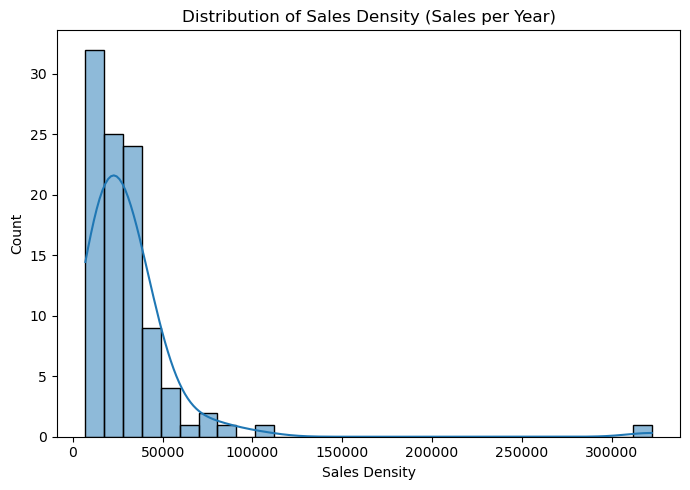

In [145]:
plt.figure(figsize=(7,5))
sns.histplot(df0["SALES_DENSITY"], bins=30, kde=True)
plt.title("Distribution of Sales Density (Sales per Year)")
plt.xlabel("Sales Density")
plt.tight_layout()
plt.show()

### Top 10 shops by Sales Density include:

CaitlynMinimalist – Sales Density ≈ 322,365
MignonandMignon – ≈ 102,558
OuferJewelry – ≈ 82,363
BABEINA, TonyscollectionUS, and others follow.
A histogram of SALES_DENSITY shows a long right tail: most shops have moderate growth efficiency, while a small set of very efficient shops grow extremely fast.

### Implications:

High-density shops combine strong demand with relatively short operating histories, indicating rapid scaling.
New shops can benchmark themselves against these density values to assess if they are on a high-growth path.

### 3.4 Top 10 most efficient stores

In [146]:
top_density = (
    df0
    .sort_values("SALES_DENSITY", ascending=False)
    .head(10)[["SHOP", "SALES", "STORE_AGE", "SALES_DENSITY"]]
)
print(top_density)

                    SHOP      SALES  STORE_AGE  SALES_DENSITY
0      CaitlynMinimalist  3546010.0       11.0  322364.545455
1        MignonandMignon   820464.0        8.0  102558.000000
4           OuferJewelry   494179.0        6.0   82363.166667
9                BABEINA   396046.0        5.0   79209.200000
15     TonyscollectionUS   293762.0        4.0   73440.500000
41          Aftersundayy   188654.0        3.0   62884.666667
18       CamelliaAndLove   265163.0        5.0   53032.600000
6             SamiJEWELS   476468.0        9.0   52940.888889
34  DaintyPersonalizedCo   207435.0        4.0   51858.750000
10             EveandkUS   354982.0        7.0   50711.714286


C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\4204379207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


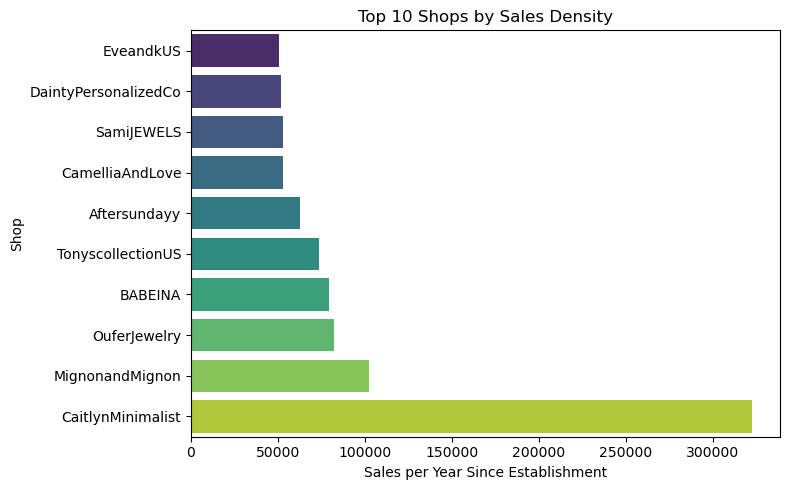

In [147]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_density,
    x="SALES_DENSITY",
    y="SHOP",
    order=top_density.sort_values("SALES_DENSITY")["SHOP"],
    palette="viridis"
)
plt.title("Top 10 Shops by Sales Density")
plt.xlabel("Sales per Year Since Establishment")
plt.ylabel("Shop")
plt.tight_layout()
plt.show()

## 4. Product-Level Analysis

### 4.1 Top-Performing Products within Categories

### Earrings

In [148]:
df_earrings = df[df["LISTING"].str.contains("Earrings", case=False, na=False)]

In [149]:
df_earrings = df_earrings.sort_values(by="EST. REVENUE", ascending=False)

In [150]:
df_earrings 

,LISTING,LISTING ID,TOTAL VIEWS,FAVORITES,EST. SALES,EST. REVENUE,PRICE,LISTING AGE,DAILY VIEWS,AVG_DAILY_SALES
1,Diamond Huggie Earrings by Caitlyn Minimalist ...,945311140,1907671.0,82747.0,35864.0,950396.0,26.5,1722.0,1107.82,20.826945
142,Huggie Earrings by Caitlyn Minimalist • Most F...,845499603,1078959.0,38968.0,22334.0,457847.0,20.5,1918.0,562.54,11.644421
143,Opal Inlay Huggie Earrings Set by Caitlyn Mini...,1136507412,901363.0,45797.0,14511.0,457096.5,31.5,1398.0,644.75,10.379828
162,Double Hoop Huggie Earrings by Caitlyn Minimal...,992281232,860065.0,48271.0,11868.0,427248.0,36.0,1649.0,521.57,7.197089
215,Hinged Huggie Earrings by Caitlyn Minimalist •...,902097645,675148.0,34045.0,12692.0,336338.0,26.5,1812.0,372.60,7.004415
...,...,...,...,...,...,...,...,...,...,...
2381,"Flower Earrings, Statement Earrings, Pearl Ear...",4326058514,56.0,7.0,0.0,0.0,59.0,124.0,0.45,0.000000
2382,"Flower Earrings, Statement Earrings, Pearl Ear...",4319973904,74.0,6.0,0.0,0.0,59.0,136.0,0.54,0.000000
2421,"Spiral Earrings, Pearl Drop Earrings, Boho Ear...",4324960795,60.0,4.0,0.0,0.0,54.0,126.0,0.48,0.000000
497,Marquise Diamond Jewelry Set by Caitlyn Minima...,4392103982,0.0,1.0,0.0,0.0,59.0,4.0,0.00,0.000000


In [151]:
df_earrings.to_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/Top10sellersearring.xlsx", index=False)

In [152]:
# Sort by Estimated Revenue (descending) and select top 25
top25_revenue = df_earrings.sort_values(by='EST. REVENUE', ascending=False).head(25)

# Sort by Daily Views (descending) and select top 25
top25_views = df_earrings.sort_values(by='DAILY VIEWS', ascending=False).head(25)


In [153]:
#  Display the results
print("Top 25 Earrings by Estimated Revenue:")
print(top25_revenue[['LISTING', 'EST. REVENUE', ]])

print("\nTop 25 Earrings by Daily Views:")
print(top25_views[['LISTING', 'DAILY VIEWS']])



Top 25 Earrings by Estimated Revenue:
                                                LISTING  EST. REVENUE
1     Diamond Huggie Earrings by Caitlyn Minimalist ...     950396.00
142   Huggie Earrings by Caitlyn Minimalist • Most F...     457847.00
143   Opal Inlay Huggie Earrings Set by Caitlyn Mini...     457096.50
162   Double Hoop Huggie Earrings by Caitlyn Minimal...     427248.00
215   Hinged Huggie Earrings by Caitlyn Minimalist •...     336338.00
256   Starburst Huggie Earrings by Caitlyn Minimalis...     277959.00
257   Dangling Hoop Earrings by Caitlyn Minimalist •...     277455.00
274   Dangle Link Earrings by Caitlyn Minimalist • C...     247286.00
297   Pave Petite Hoop Earrings by Caitlyn Minimalis...     211059.00
2497                      Daryl-Ann's Sunburst Earrings     192576.00
846   Raw Crystal Huggies Hoops Gold, Crystal Hoop E...     187408.00
2846  Gemstone Stud Earrings • Birthstone Post Earri...     180512.00
1659  16G Dragon Claws Cartilage Earring/Septum Ring

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\2462438088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\2462438088.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


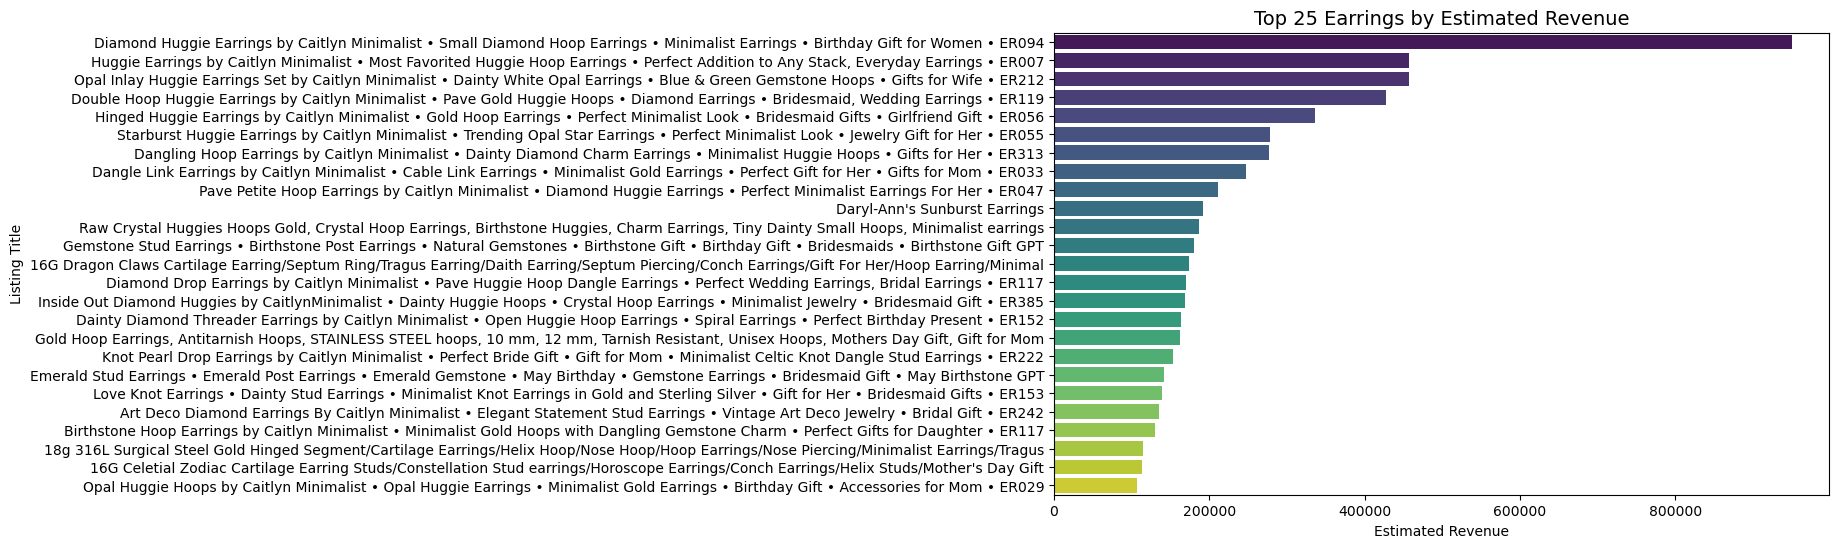

In [154]:
#  Visualize top 25 by Estimated Revenue
plt.figure(figsize=(10,6))
sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
plt.title("Top 25 Earrings by Estimated Revenue", fontsize=14)
plt.xlabel("Estimated Revenue")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()



C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\3589481778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\3589481778.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


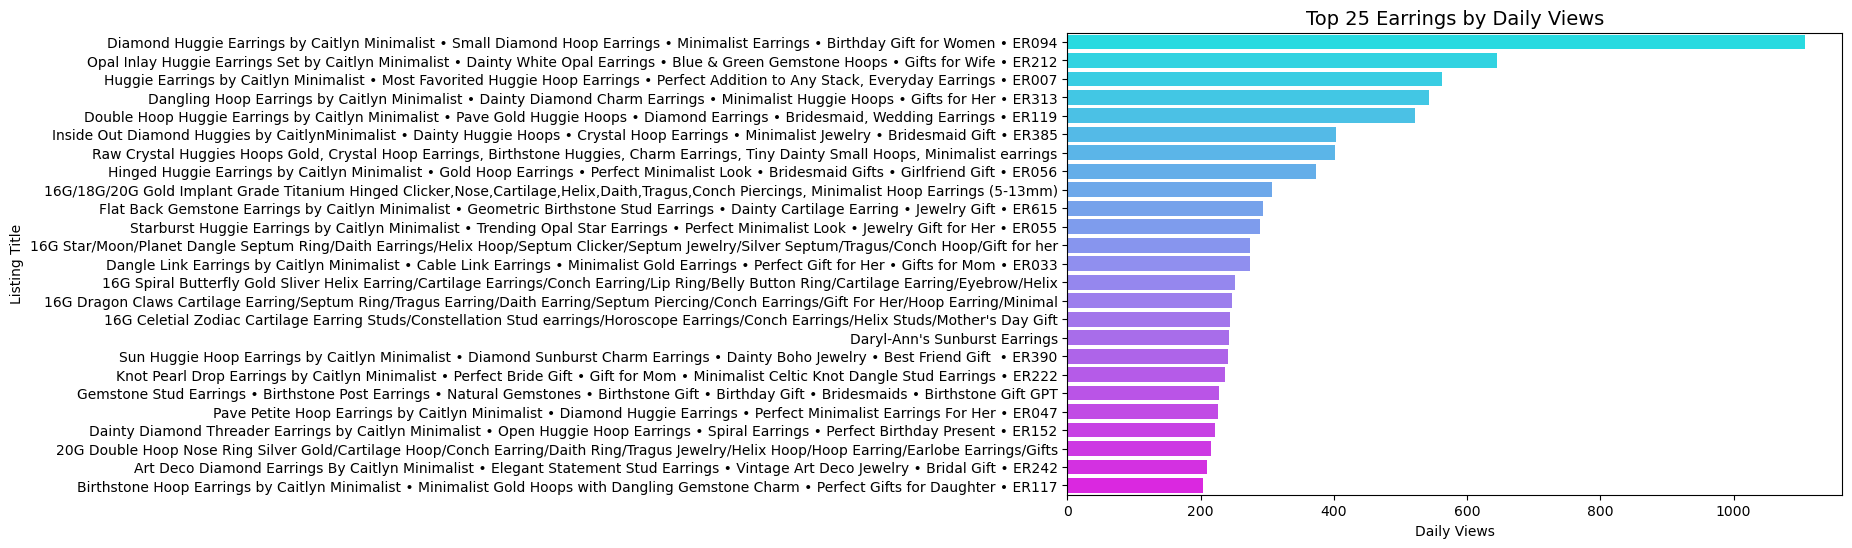

In [155]:
# Visualize top 25 by Daily Views
plt.figure(figsize=(10,6))
sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
plt.title("Top 25 Earrings by Daily Views", fontsize=14)
plt.xlabel("Daily Views")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()

### Necklaces

In [156]:
df_necklaces = df[df["LISTING"].str.contains("Necklace", case=False, na=False)]

In [157]:
df_necklaces = df_necklaces.sort_values(by="EST. REVENUE", ascending=False)

In [158]:
df_necklaces

,LISTING,LISTING ID,TOTAL VIEWS,FAVORITES,EST. SALES,EST. REVENUE,PRICE,LISTING AGE,DAILY VIEWS,AVG_DAILY_SALES
327,Personalized Name Necklace by Caitlyn Minimali...,990762977,4602193.0,120765.0,60288.0,2532096.0,42.00,1673.0,2750.86,36.035864
326,Personalized Name Necklace by Caitlyn Minimali...,990762977,4602193.0,120765.0,60288.0,2532096.0,42.00,1673.0,2750.86,36.035864
3582,"18K Gold Chain Necklace, Cable Chain, Papercli...",1022193192,2941945.0,70801.0,55308.0,1493316.0,27.00,1602.0,1836.42,34.524345
476,Family Necklace • Personalized Gift • Linked C...,492227219,2467103.0,96512.0,32319.0,1357398.0,42.00,3267.0,755.16,9.892562
897,Personalized Jewelry Gift for Mom from Husband...,276448272,2014434.0,84711.0,21554.0,1077700.0,50.00,3489.0,577.37,6.177701
...,...,...,...,...,...,...,...,...,...,...
3648,"2 Pcs Layer Necklace Set, Gold Necklace Stack:...",4392628367,28.0,2.0,0.0,0.0,45.00,9.0,3.11,0.000000
3559,Teardrop Birthstone Necklace by GracePersonali...,4379175583,36.0,0.0,0.0,0.0,79.55,32.0,1.13,0.000000
3560,Emerald Birthstone Necklace by GracePersonaliz...,4379165322,47.0,0.0,0.0,0.0,85.34,32.0,1.47,0.000000
3561,Dainty Round Birthstone Necklace by GracePerso...,4378560081,29.0,2.0,0.0,0.0,77.65,33.0,0.88,0.000000


In [159]:
df_necklaces.to_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/Top10sellernecklaces.xlsx", index=False)

In [160]:
# Sort by Estimated Revenue (descending) and select top 25
top25_revenue = df_necklaces.sort_values(by='EST. REVENUE', ascending=False).head(25)

# Sort by Daily Views (descending) and select top 25
top25_views = df_necklaces.sort_values(by='DAILY VIEWS', ascending=False).head(25)


In [161]:
#  Display the results
print("Top 25 Necklaces by Estimated Revenue:")
print(top25_revenue[['LISTING', 'EST. REVENUE', ]])

print("\nTop 25 Necklaces by Daily Views:")
print(top25_views[['LISTING', 'DAILY VIEWS']])


Top 25 Necklaces by Estimated Revenue:
                                                LISTING  EST. REVENUE
327   Personalized Name Necklace by Caitlyn Minimali...    2532096.00
326   Personalized Name Necklace by Caitlyn Minimali...    2532096.00
3582  18K Gold Chain Necklace, Cable Chain, Papercli...    1493316.00
476   Family Necklace • Personalized Gift • Linked C...    1357398.00
897   Personalized Jewelry Gift for Mom from Husband...    1077700.00
484   Letter Necklace by Caitlyn Minimalist • Name N...    1069485.00
513   Custom Birthstone Necklace for Mom Push Gift f...     811634.59
3581  Heart Locket Necklace with Photo, Big Heart Lo...     742118.00
901   Raw Crystal Necklace, Rose quartz, Carnelian C...     692639.00
3435  Personalized Letter Name Necklace by GracePers...     543104.33
116   Dainty Initial Tag Necklace by Caitlyn Minimal...     533360.00
812   Layered Necklace Set, 3 Initial Disk Necklaces...     525616.00
3357  Custom Name Necklace on Curb Chain by GracePe

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\3783832568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\3783832568.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


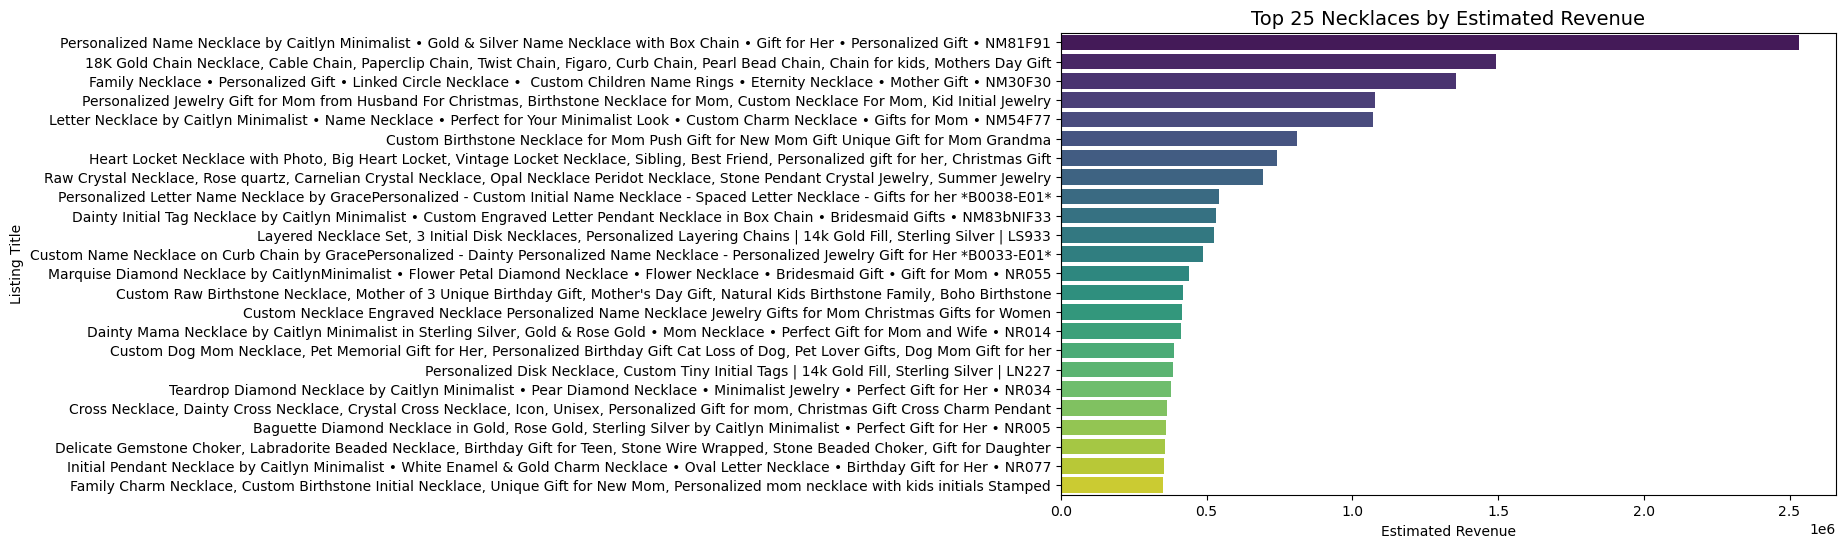

In [162]:
#  Visualize top 25 by Estimated Revenue
plt.figure(figsize=(10,6))
sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
plt.title("Top 25 Necklaces by Estimated Revenue", fontsize=14)
plt.xlabel("Estimated Revenue")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()


C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\945624575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\945624575.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


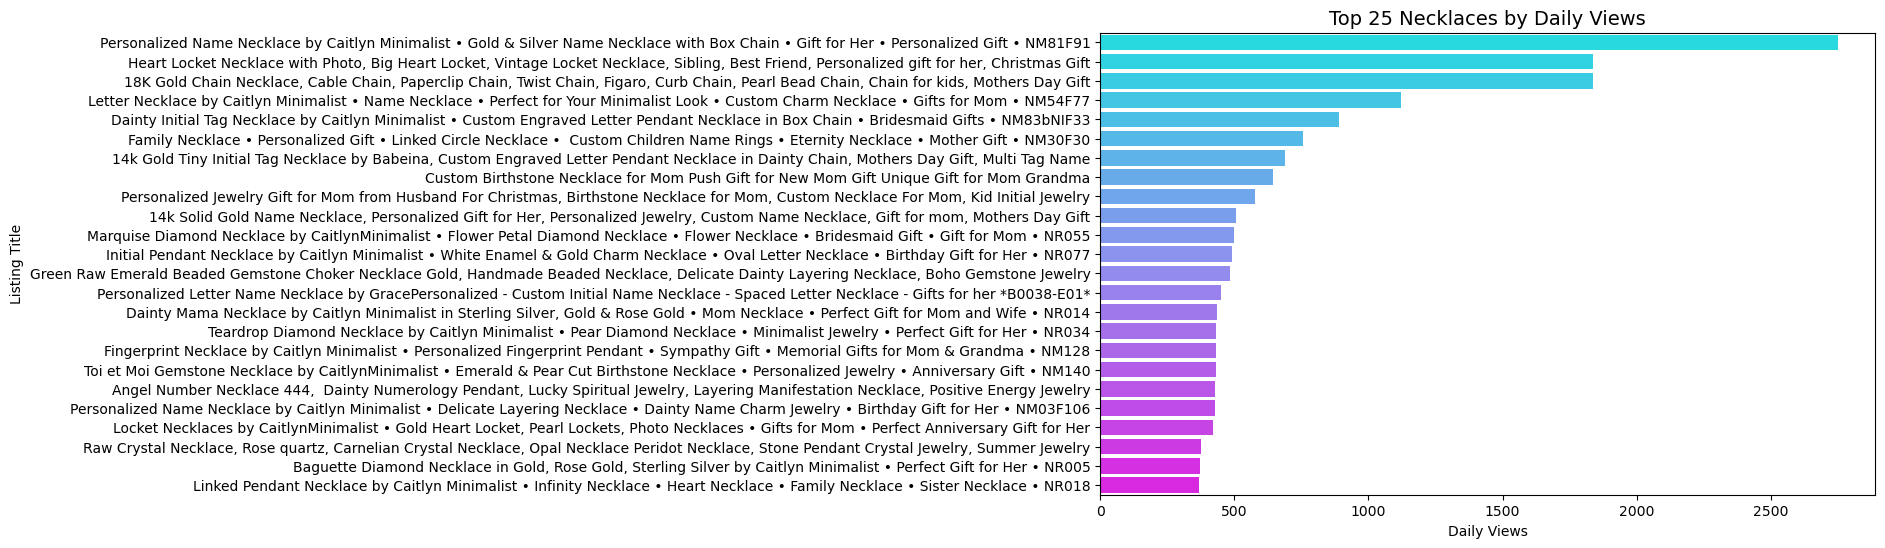

In [163]:
# Visualize top 25 by Daily Views
plt.figure(figsize=(10,6))
sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
plt.title("Top 25 Necklaces by Daily Views", fontsize=14)
plt.xlabel("Daily Views")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()

### Bracelet 

In [164]:
df_bracelets = df[df["LISTING"].str.contains("Bracelet", case=False, na=False)]

In [165]:
df_bracelets = df_bracelets.sort_values(by="EST. REVENUE", ascending=False)

In [166]:
df_bracelets

,LISTING,LISTING ID,TOTAL VIEWS,FAVORITES,EST. SALES,EST. REVENUE,PRICE,LISTING AGE,DAILY VIEWS,AVG_DAILY_SALES
339,Handwriting Bracelet • Custom Actual Handwriti...,209384686,4209479.0,187154.0,58090.0,2149330.00,37.00,4012.0,1049.22,14.479063
568,Personalized Bracelet Custom Bracelet Engraved...,546098844,1020312.0,28768.0,21120.0,497798.40,23.57,2956.0,345.17,7.144790
160,Minimalist Bracelet Chains by Caitlyn Minimali...,882615239,787772.0,32115.0,14810.0,429490.00,29.00,1847.0,426.51,8.018408
3346,Custom Name Bracelet on Curb Chain by Grace Pe...,790069466,638791.0,30203.0,4216.0,408994.16,97.01,2009.0,317.96,2.098556
190,Duo Bead Chain Bracelet • Perfect Birthday Gif...,1016875279,715585.0,34916.0,9875.0,390062.50,39.50,1631.0,438.74,6.054568
...,...,...,...,...,...,...,...,...,...,...
1288,"Labradorite Crystal Bracelet, Transformation C...",1782460190,60.0,10.0,0.0,0.00,34.00,410.0,0.15,0.000000
490,Heart Station Jewelry Set by Caitlyn Minimalis...,4394194729,0.0,1.0,0.0,0.00,67.00,0.0,0.00,NaN
491,Heart Station Jewelry Set by Caitlyn Minimalis...,4394194729,0.0,1.0,0.0,0.00,67.00,0.0,0.00,NaN
3595,"2PCS Stack Bracelet SET, Rope - Herringbone Br...",4383083204,57.0,4.0,0.0,0.00,64.00,25.0,2.28,0.000000


In [167]:
df_bracelets.to_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/Top10sellerbracelets.xlsx", index=False)

In [168]:
# Sort by Estimated Revenue (descending) and select top 25
top25_revenue = df_bracelets.sort_values(by='EST. REVENUE', ascending=False).head(25)

# Sort by Daily Views (descending) and select top 25
top25_views = df_bracelets.sort_values(by='DAILY VIEWS', ascending=False).head(25)

In [169]:
#  Display the results
print("Top 25 Bracelets by Estimated Revenue:")
print(top25_revenue[['LISTING', 'EST. REVENUE', ]])

print("\nTop 25 Bracelets by Daily Views:")
print(top25_views[['LISTING', 'DAILY VIEWS']])


Top 25 Bracelets by Estimated Revenue:
                                                LISTING  EST. REVENUE
339   Handwriting Bracelet • Custom Actual Handwriti...    2149330.00
568   Personalized Bracelet Custom Bracelet Engraved...     497798.40
160   Minimalist Bracelet Chains by Caitlyn Minimali...     429490.00
3346  Custom Name Bracelet on Curb Chain by Grace Pe...     408994.16
190   Duo Bead Chain Bracelet • Perfect Birthday Gif...     390062.50
719   Dainty Personalized Bar Bracelet for Names, Da...     372072.00
2857  Dainty Bracelet Set - Bracelets for Women, Ini...     280728.00
633   Personalized Bracelet For Woman Engraved Name ...     279440.03
3385  Custom Engraved Name Bar Bracelet on Curb Chai...     264472.67
2405  Turquoise Bracelet, Turquoise Tennis Bracelet,...     217745.00
727   Super Dainty Initial Bracelet, Personalized Ti...     211736.00
2433  Tennis Bracelet, Gold Tennis Bracelet, Cubic Z...     200876.00
2699  Two Delicate Bracelets Set, Dainty Bracelet S

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\497374329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\497374329.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


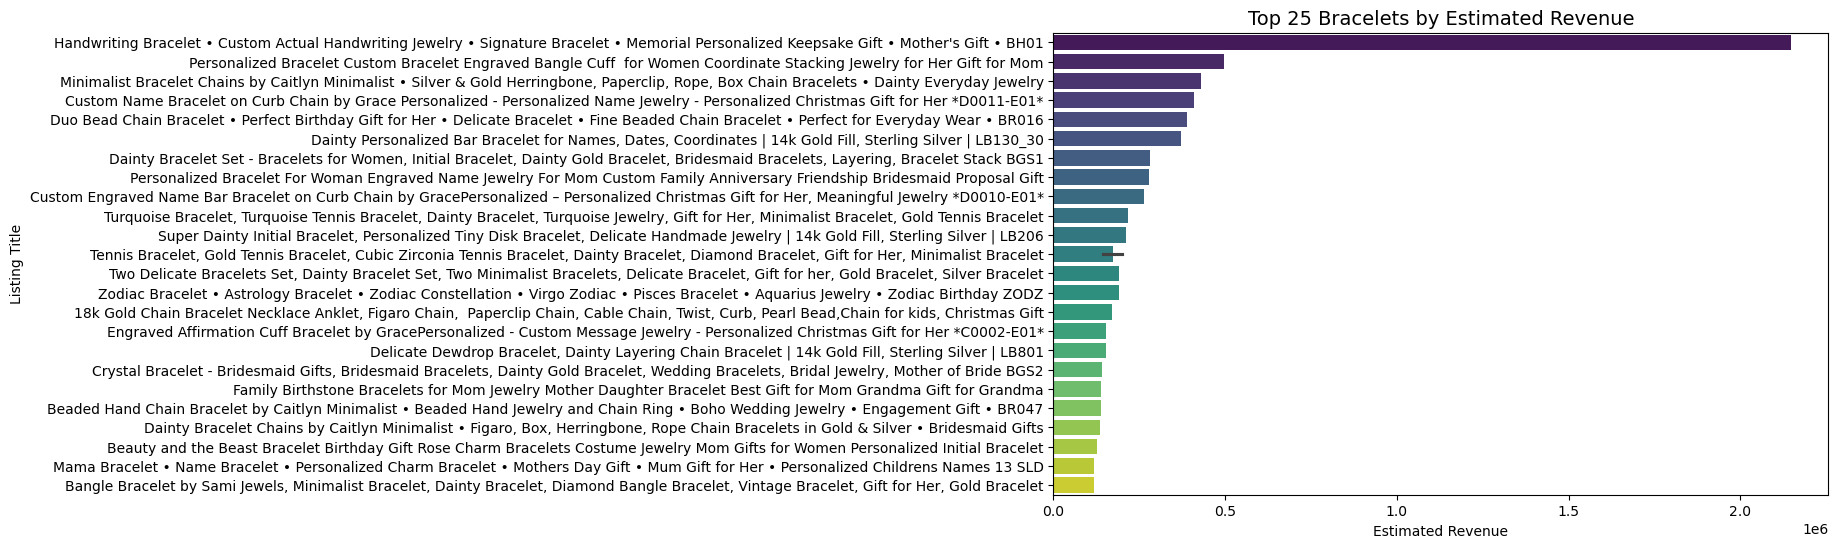

In [170]:
#  Visualize top 25 by Estimated Revenue
plt.figure(figsize=(10,6))
sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
plt.title("Top 25 Bracelets by Estimated Revenue", fontsize=14)
plt.xlabel("Estimated Revenue")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\2118218609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\2118218609.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


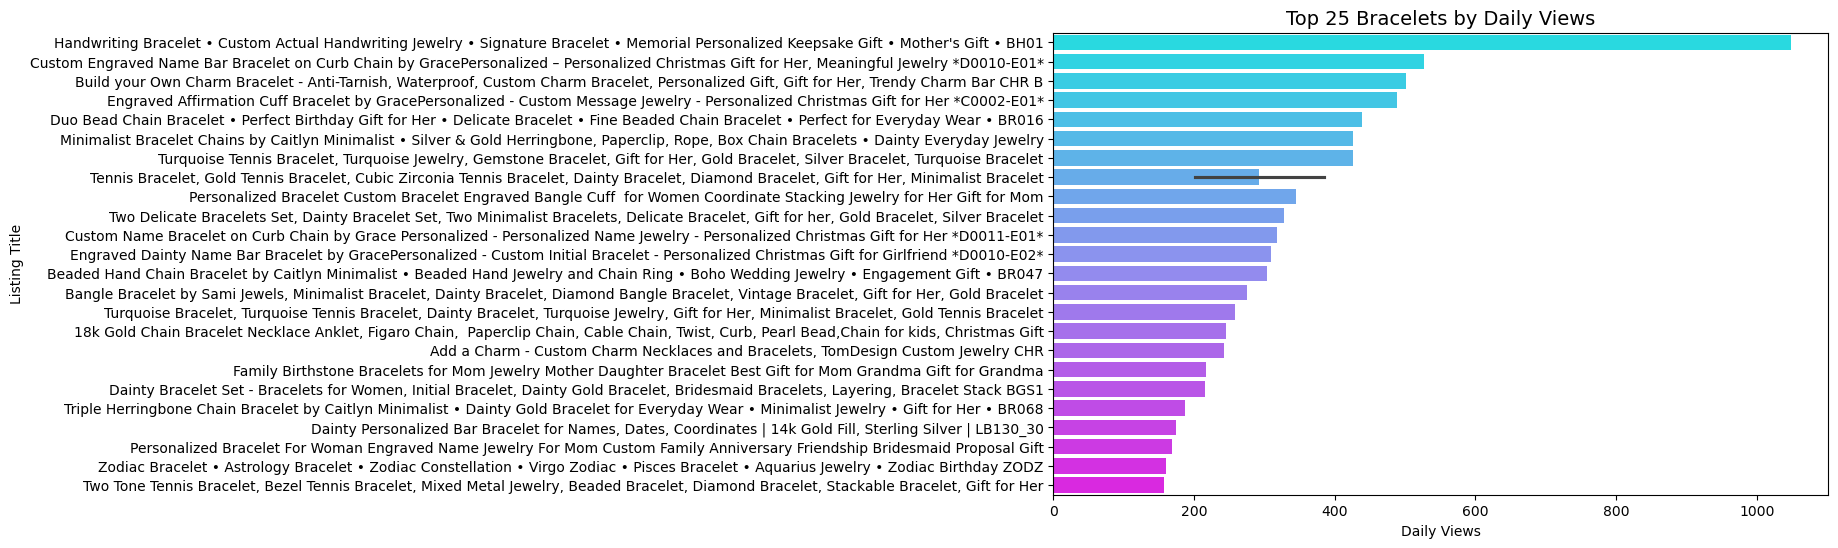

In [171]:
# Visualize top 25 by Daily Views
plt.figure(figsize=(10,6))
sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
plt.title("Top 25 Bracelets by Daily Views", fontsize=14)
plt.xlabel("Daily Views")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()

### Rings

In [172]:
df_rings = df[df["LISTING"].str.contains("Ring", case=False, na=False)]

In [173]:
df_rings = df_rings.sort_values(by="EST. REVENUE", ascending=False)

In [174]:
df_rings

,LISTING,LISTING ID,TOTAL VIEWS,FAVORITES,EST. SALES,EST. REVENUE,PRICE,LISTING AGE,DAILY VIEWS,AVG_DAILY_SALES
453,Double Name Ring • Two Name Ring in Sterling S...,776377544,3928401.0,171971.0,63247.0,1992280.50,31.50,2039.0,1926.63,31.018637
470,Custom Delicate Name Ring • Custom Stacking Ri...,469538833,3041275.0,139548.0,57175.0,1515137.50,26.50,3374.0,901.39,16.945762
476,Family Necklace • Personalized Gift • Linked C...,492227219,2467103.0,96512.0,32319.0,1357398.00,42.00,3267.0,755.16,9.892562
1,Diamond Huggie Earrings by Caitlyn Minimalist ...,945311140,1907671.0,82747.0,35864.0,950396.00,26.50,1722.0,1107.82,20.826945
3356,Dainty Stacking Name Ring by Grace Personalize...,784021190,1427042.0,52333.0,12843.0,881286.66,68.62,2022.0,705.76,6.351632
...,...,...,...,...,...,...,...,...,...,...
1793,16G Surgical Steel Petal Flower Daith Earring/...,4371789025,16.0,1.0,0.0,0.00,15.99,45.0,0.36,0.000000
3727,Layering Necklace Set - 2Pcs: Disc Sequin Cha...,4392644932,11.0,2.0,0.0,0.00,45.00,9.0,1.22,0.000000
2671,"Emerald Earrings, May Birthstone, Huggie Earri...",4325035997,48.0,3.0,0.0,0.00,43.00,126.0,0.38,0.000000
2824,"Toe Ring, Adjustable Toe Ring, Foot Jewelry, B...",4390726679,15.0,5.0,0.0,0.00,28.00,6.0,2.50,0.000000


In [175]:
df_rings.to_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/Top10sellerrings.xlsx", index=False)

In [176]:
# Sort by Estimated Revenue (descending) and select top 25
top25_revenue = df_rings.sort_values(by='EST. REVENUE', ascending=False).head(25)

# Sort by Daily Views (descending) and select top 25
top25_views = df_rings.sort_values(by='DAILY VIEWS', ascending=False).head(25)

In [177]:
#  Display the results
print("Top 25 Rings by Estimated Revenue:")
print(top25_revenue[['LISTING', 'EST. REVENUE', ]])

print("\nTop 25 Rings by Daily Views:")
print(top25_views[['LISTING', 'DAILY VIEWS']])

Top 25 Rings by Estimated Revenue:
                                                LISTING  EST. REVENUE
453   Double Name Ring • Two Name Ring in Sterling S...    1992280.50
470   Custom Delicate Name Ring • Custom Stacking Ri...    1515137.50
476   Family Necklace • Personalized Gift • Linked C...    1357398.00
1     Diamond Huggie Earrings by Caitlyn Minimalist ...     950396.00
3356  Dainty Stacking Name Ring by Grace Personalize...     881286.66
49    Initial Birthstone Ring • Letter Ring by Caitl...     745127.00
73    Memorial Handwriting Ring • Actual Handwriting...     674982.00
78    Duo Baguette Birthstone Ring by Caitlyn Minima...     639040.50
812   Layered Necklace Set, 3 Initial Disk Necklaces...     525616.00
142   Huggie Earrings by Caitlyn Minimalist • Most F...     457847.00
143   Opal Inlay Huggie Earrings Set by Caitlyn Mini...     457096.50
159   Minimalist Birthstone Ring • Gemstone Ring in ...     429677.50
160   Minimalist Bracelet Chains by Caitlyn Minimali...

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\1436278091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\1436278091.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


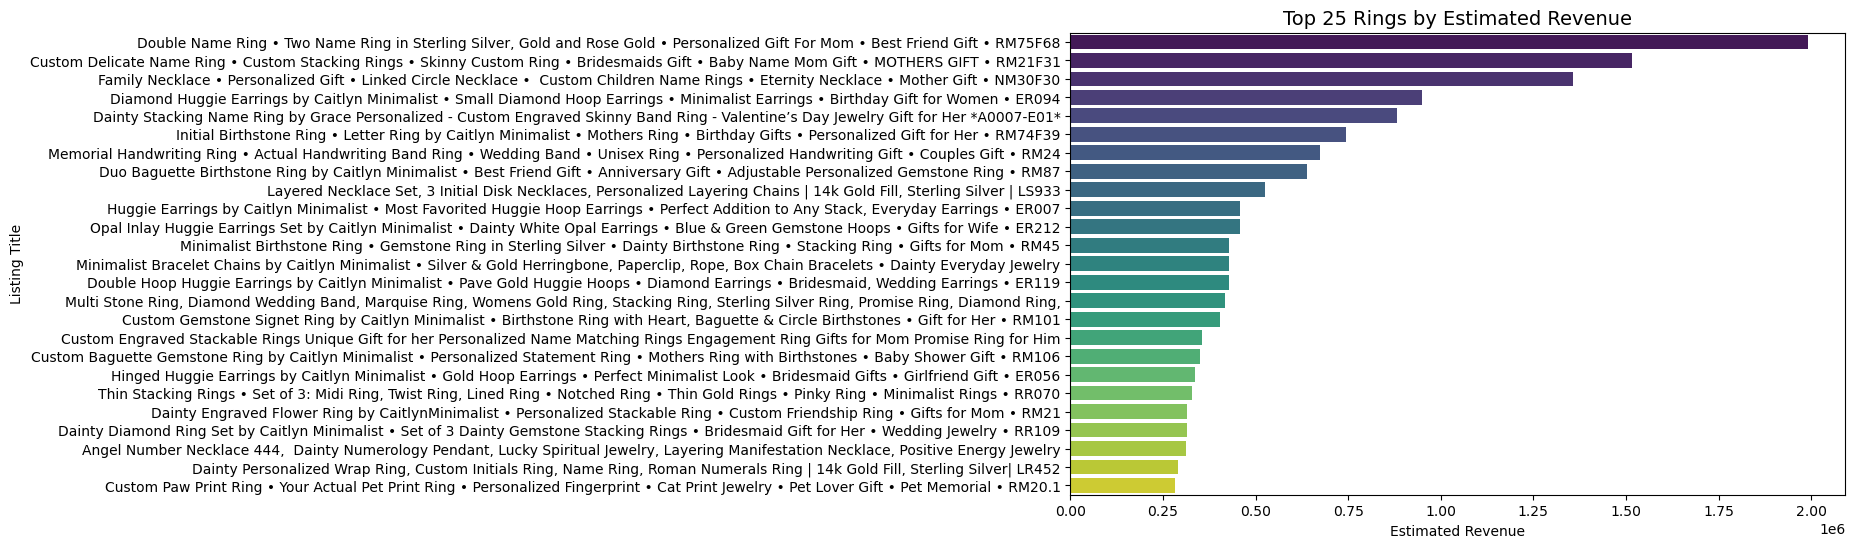

In [178]:
#  Visualize top 25 by Estimated Revenue
plt.figure(figsize=(10,6))
sns.barplot(data=top25_revenue, x='EST. REVENUE', y='LISTING', palette='viridis')
plt.title("Top 25 Rings by Estimated Revenue", fontsize=14)
plt.xlabel("Estimated Revenue")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\3152272756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\3152272756.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


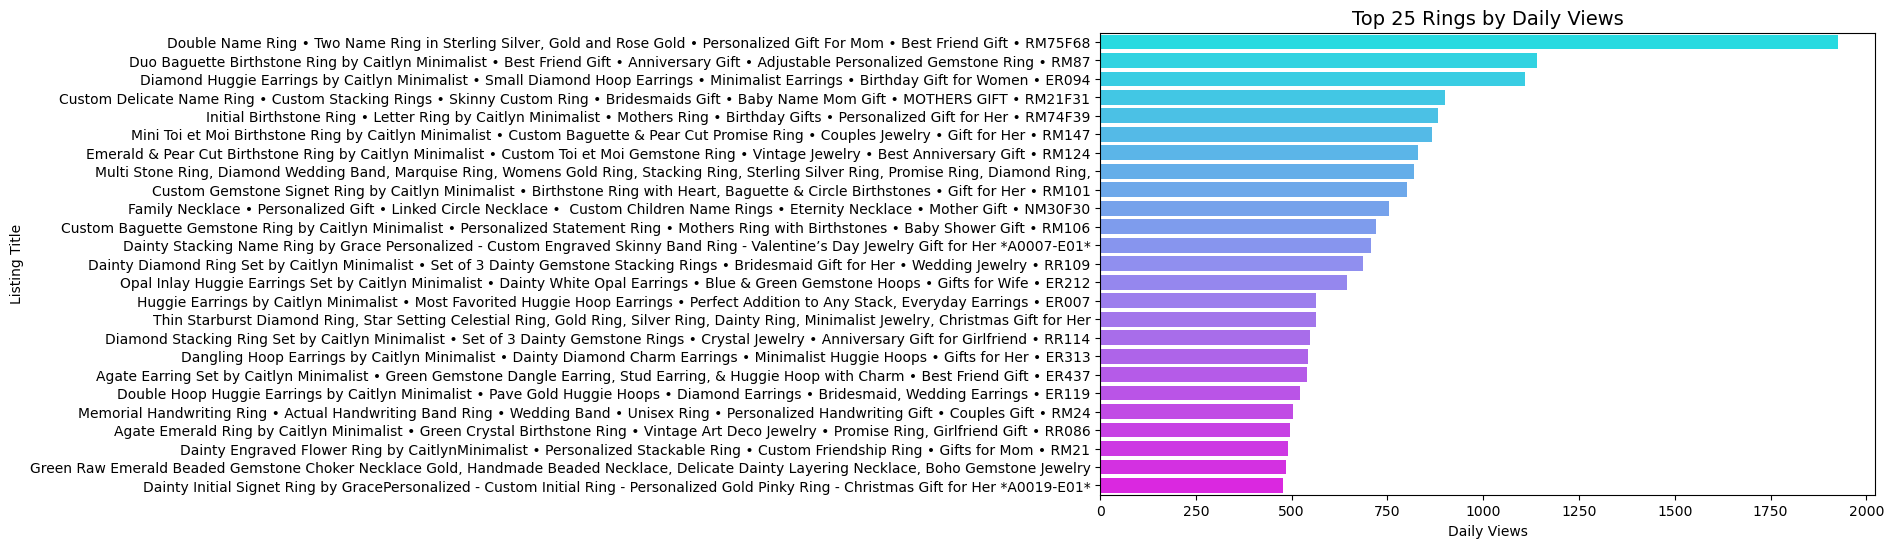

In [179]:
# Visualize top 25 by Daily Views
plt.figure(figsize=(10,6))
sns.barplot(data=top25_views, x='DAILY VIEWS', y='LISTING', palette='cool')
plt.title("Top 25 Rings by Daily Views", fontsize=14)
plt.xlabel("Daily Views")
plt.ylabel("Listing Title")
plt.tight_layout()
plt.show()

### Top 50 best seller items 

In [180]:
df = df.sort_values(by="EST. REVENUE", ascending=False)

In [181]:
df.head(50)

,LISTING,LISTING ID,TOTAL VIEWS,FAVORITES,EST. SALES,EST. REVENUE,PRICE,LISTING AGE,DAILY VIEWS,AVG_DAILY_SALES
326,Personalized Name Necklace by Caitlyn Minimali...,990762977,4602193.0,120765.0,60288.0,2532096.00,42.00,1673.0,2750.86,36.035864
327,Personalized Name Necklace by Caitlyn Minimali...,990762977,4602193.0,120765.0,60288.0,2532096.00,42.00,1673.0,2750.86,36.035864
339,Handwriting Bracelet • Custom Actual Handwriti...,209384686,4209479.0,187154.0,58090.0,2149330.00,37.00,4012.0,1049.22,14.479063
453,Double Name Ring • Two Name Ring in Sterling S...,776377544,3928401.0,171971.0,63247.0,1992280.50,31.50,2039.0,1926.63,31.018637
470,Custom Delicate Name Ring • Custom Stacking Ri...,469538833,3041275.0,139548.0,57175.0,1515137.50,26.50,3374.0,901.39,16.945762
3582,"18K Gold Chain Necklace, Cable Chain, Papercli...",1022193192,2941945.0,70801.0,55308.0,1493316.00,27.00,1602.0,1836.42,34.524345
476,Family Necklace • Personalized Gift • Linked C...,492227219,2467103.0,96512.0,32319.0,1357398.00,42.00,3267.0,755.16,9.892562
897,Personalized Jewelry Gift for Mom from Husband...,276448272,2014434.0,84711.0,21554.0,1077700.00,50.00,3489.0,577.37,6.177701
484,Letter Necklace by Caitlyn Minimalist • Name N...,870847843,2094578.0,65474.0,28905.0,1069485.00,37.00,1869.0,1120.69,15.465490
1,Diamond Huggie Earrings by Caitlyn Minimalist ...,945311140,1907671.0,82747.0,35864.0,950396.00,26.50,1722.0,1107.82,20.826945


In [182]:
df.to_excel("C:/2024 2025 SETON HALL/Fall 2025/Data Analytics in Accounting/Final Project/Top10sellerTop50BestSellerItems.xlsx", index=False)

### 4.2 Distribution of products prices

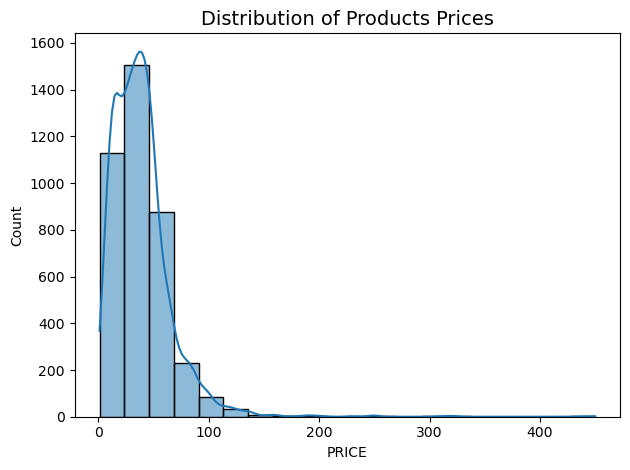

In [183]:
sns.histplot(df['PRICE'], bins=20, kde=True)
plt.title("Distribution of Products Prices",fontsize=14)
plt.tight_layout()
plt.show()

### Findings:

The majority of products are priced in a moderate range, with a dense cluster in lower to mid-price points.
There is a long tail of higher-priced items, but these are less frequent.
### Implication:
The market is competitive in mid-price segments. Extreme high price points are less common and likely require strong differentiation (e.g., fine materials, solid gold, or high-end customization).



### 4.3  Price vs. sales relationship (scatter + regression)
To explore how price affects sales, a scatter plot and regression line were created:

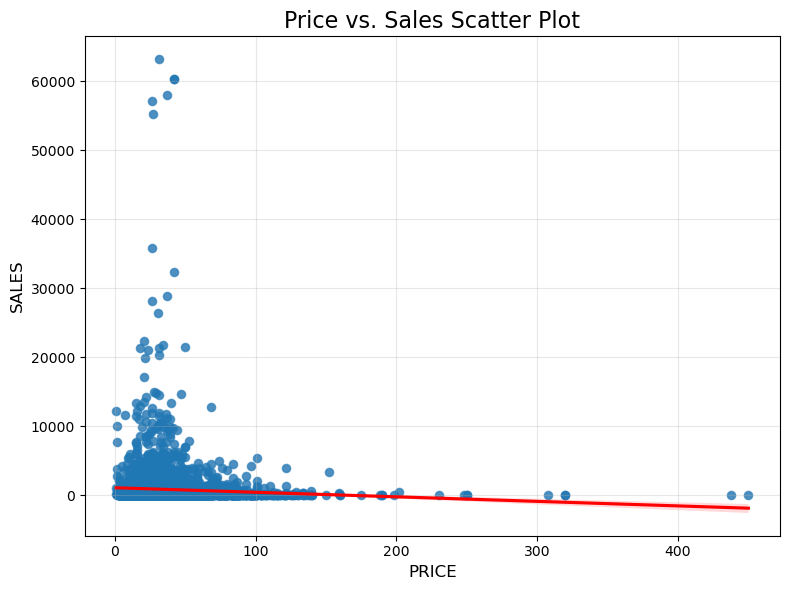

In [184]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=df["PRICE"], y=df["EST. SALES"], color='steelblue', alpha=0.6)

sns.regplot(data=df, x=df["PRICE"], y=df["EST. SALES"], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title("Price vs. Sales Scatter Plot", fontsize=16)
plt.xlabel("PRICE", fontsize=12)
plt.ylabel("SALES", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [185]:
from sklearn.linear_model import LinearRegression

X = df[["PRICE"]].values
y = df["EST. SALES"].values

model = LinearRegression()
model.fit(X, y)

print("Slope (change in sales per $1 price):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2:", model.score(X, y))

Slope (change in sales per $1 price): -6.583023596568647
Intercept: 1112.0065626300889
R^2: 0.0034503689370892765


### Interpretation:

There is no strong linear relationship between price and estimated sales across all listings.
Successful products exist at various price points; other factors such as design, personalization, photos, and reviews likely play more important roles than price alone.

### 4.4 Correlation Analysis of Reviews, Favorites, and Sales
A correlation matrix of numeric variables was computed and visualized via heatmap:

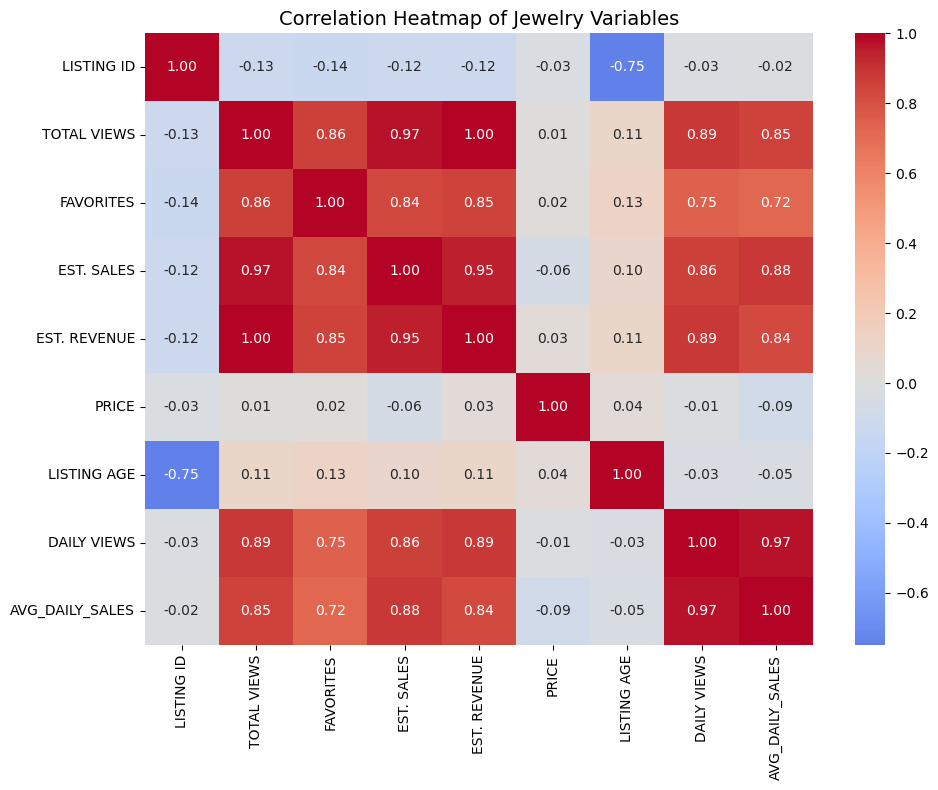

In [186]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            center=0)         

plt.title('Correlation Heatmap of Jewelry Variables', fontsize=14)
plt.tight_layout()
plt.show()


### High-level patterns:

EST. SALES and EST. REVENUE are, as expected, very strongly positively correlated.
TOTAL VIEWS, FAVORITES, and DAILY VIEWS show moderate to strong positive correlations with EST. SALES and EST. REVENUE.
PRICE has weak correlation with sales and revenue, supporting the regression result.
### Insight:
Customer engagement metrics (views and favorites) are more predictive of sales and revenue than price. Driving traffic and favorites is critical.

### 4.6 Listing Age and Daily Activity (Life Cycle)
To understand product life cycles, LISTING AGE was compared with DAILY VIEWS:

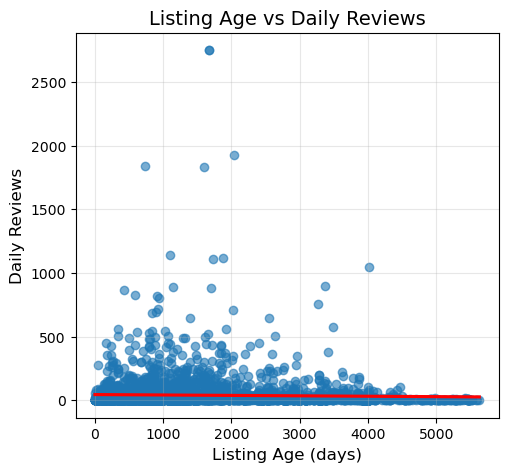

In [187]:
plt.figure(figsize=(12,5))

# Listing Age vs Daily Reviews
plt.subplot(1,2,1)
sns.regplot(data=df, x=df["LISTING AGE"], y=df["DAILY VIEWS"],
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Listing Age vs Daily Reviews", fontsize=14)
plt.xlabel("Listing Age (days)", fontsize=12)
plt.ylabel("Daily Reviews", fontsize=12)
plt.grid(alpha=0.3)

### Observations:

The relationship between listing age and daily views is not purely monotonic:
Some older listings still receive substantial daily views, especially established best-sellers.
Many newer listings have low daily views until they gain traction through reviews and social proof.
### Implication:
Successful products can maintain high engagement over long periods, but new listings require initial exposure and possibly promotion or differentiation to reach that level.



### 4.7 Best‑selling categories (earrings / necklaces / bracelets / rings)

In [188]:
def label_category(name):
    name = str(name).lower()
    if "earring" in name:
        return "Earrings"
    if "necklace" in name:
        return "Necklaces"
    if "bracelet" in name:
        return "Bracelets"
    if "ring" in name:
        return "Rings"
    return "Other"

df["CATEGORY"] = df["LISTING"].apply(label_category)

category_sales = (
    df
    .groupby("CATEGORY", as_index=False)
    .agg(
        TotalRevenue=("EST. REVENUE", "sum"),
        TotalSales=("EST. SALES", "sum"),
        AvgPrice=("PRICE", "mean"),
        NumListings=("LISTING ID", "count"),
    )
    .sort_values("TotalRevenue", ascending=False)
)

print(category_sales)

    CATEGORY  TotalRevenue  TotalSales   AvgPrice  NumListings
2  Necklaces   51202261.34   1317333.0  49.714490         1274
4      Rings   25371508.40    771417.0  38.085945          688
1   Earrings   17234398.13    721345.0  30.322716         1064
0  Bracelets   12867780.35    346545.0  46.948454          427
3      Other    2478356.49    177036.0  20.580571          438


C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36204\47076162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


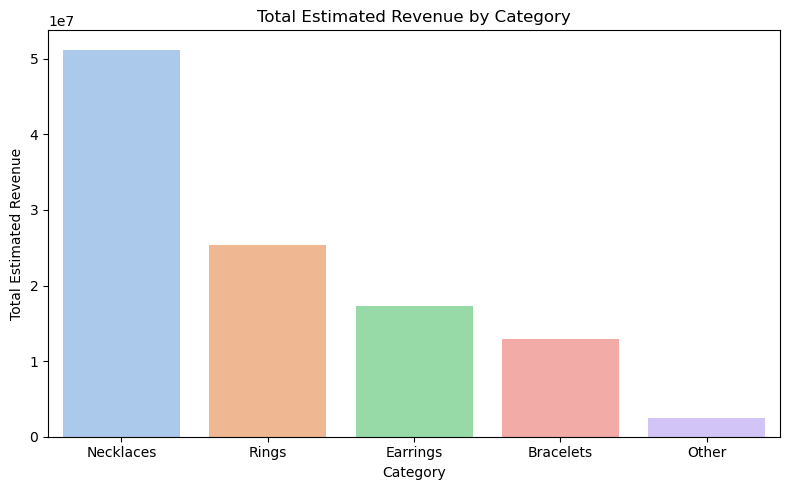

In [189]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=category_sales,
    x="CATEGORY",
    y="TotalRevenue",
    palette="pastel"
)
plt.title("Total Estimated Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Estimated Revenue")
plt.tight_layout()
plt.show()

### A bar chart of Total Estimated Revenue by Category shows that:

Necklaces generate the highest total revenue and have the largest number of listings.
Rings and Earrings also contribute significantly.
Bracelets have fewer listings but relatively high average prices.
### Insight:
Focusing on necklaces provides access to the largest revenue pool, but rings and earrings are also attractive categories with substantial demand.

### 4.8 Machine Learning (multivariate regression)

In [204]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Keep only the columns we need and drop rows with missing values
model_df = df[[
    "EST. SALES",
    "TOTAL VIEWS",
    "FAVORITES",
    "LISTING AGE",
    "PRICE"
]].dropna()

X = model_df[["TOTAL VIEWS", "FAVORITES", "LISTING AGE", "PRICE"]]
y = model_df["EST. SALES"]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [206]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, max_iter=10000).fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)

lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=100000).fit(X_train, y_train)

# Print coefficients and intercept
print("lasso.coef_:", lasso.coef_)
print("lasso.intercept_:", lasso.intercept_)

# Print training and test scores
print("Training set Score:", lasso.score(X_train, y_train))
print("Test set Score:", lasso.score(X_test, y_test))

Best alpha: 614041.10190909
lasso.coef_: [ 0.01511927  0.         -0.         -0.        ]
lasso.intercept_: 30.276912466343447
Training set Score: 0.9404044800082063
Test set Score: 0.9293275359265339


       Feature  Importance
1    FAVORITES    0.000000
2  LISTING AGE    0.000000
3        PRICE    0.000000
0  TOTAL VIEWS    0.015119


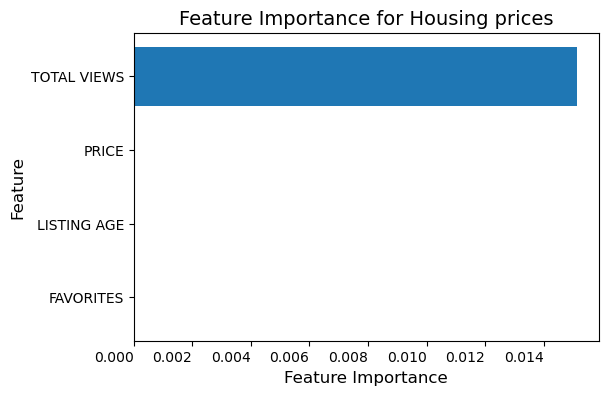

In [208]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lasso.coef_)}).sort_values(by='Importance', ascending=True)
print(importance_df)

# Plot in ascending order
plt.figure(figsize=(6, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.title("Feature Importance for Housing prices", fontsize=14)
plt.show()

### Finding:
views are the dominant driver of estimated sales; the other features contribute very little in this regularized model.

## 5. Key Findings and Business Implications

### 5.1 Market-Level
#### Concentrated Sales Distribution

A relatively small number of shops (top 62) generate about 80% of total market sales.
New entrants must be prepared to compete against well-established, high-performance shops.

#### Store Age Matters, But Is Not Everything

Older shops generally have higher total sales, but:
Several younger shops achieve high efficiency (sales per year).
New sellers can still succeed if they quickly reach high sales density.


#### High-Growth “Benchmark” Shops

Top shops by Sales Density (e.g., CaitlynMinimalist, MignonandMignon) represent growth benchmarks:
New shops can compare their own first-year performance against these benchmarks.

    
### 5.2 Product-Level

#### Necklaces Lead in Total Revenue

Necklaces are the dominant revenue category, followed by rings and earrings.
Bracelets comprise fewer listings yet maintain relatively high average prices, implying possible higher margins.

#### Personalization is a Major Success Driver

Top listings across categories frequently include personalized features:
Name/initial jewelry
Birthstones
Custom engravings/handwriting


#### Price Alone Does Not Determine Success

Price vs. sales shows weak linear correlation and very low R2
 .
Effective offerings exist from low to high price points; value perception and engagement matter more than raw price.


#### Engagement (Views/Favorites) Strongly Correlates with Sales

Listings with higher TOTAL VIEWS, DAILY VIEWS, and FAVORITES tend to achieve higher sales and revenue.
Investment in photography, SEO, and marketing that boosts views and favorites is likely to pay off more than small price adjustments.
Product Life Cycle

Some long-standing listings maintain high daily views and continue to generate strong revenue over time.
However, many listings remain low-traffic, suggesting that continuous optimization and testing of titles, images, and tags is necessary.

## 6. Recommendations

### For New Sellers:

Consider entering necklaces, rings, or earrings with a strong focus on personalization.
Benchmark your early sales against the Sales Density of efficient shops to gauge performance.
Focus on increasing views and favorites through high-quality photos, SEO-friendly titles, and marketing rather than competing only on price.


### For Existing Shops:

Identify current listings with good engagement but moderate revenue and explore:
Slight price optimization,
Improved description and photos,
Bundling or upsell strategies.
Double down on product types (e.g., personalized name jewelry) that are consistently present among market leaders.


### For Further Analysis:

Incorporate review ratings (if available) to better understand quality and trust effects.
Segment results by price tiers or material types (e.g., gold-filled vs. sterling silver) to refine positioning strategies.
